In [1]:
import pandas as pd
import numpy as np
from Util import Unit, Facility, generate_units, calculate_bounds, extend_bounds
from PlotSolution import plot
from Solvers import BruteForceObnPMed, VNSObnPMed, SAObnPMed, TSObnPMed, APFObnPMed, APFObnPMedWithConstraint
import time

In [2]:
france_nuclear_csv = pd.read_csv('TestData/FranceNuclear/centrales-de-production-nucleaire-edf.csv', sep = ';')
france_nuclear_csv.drop_duplicates(subset=['GPS position (wsg84)'], keep='first', inplace = True)
france_nuclear = generate_units(france_nuclear_csv['Unit'].to_string(), france_nuclear_csv['GPS position (wsg84)'].to_string())
print(france_nuclear[5])

france_cities_csv = pd.read_csv('TestData/FranceNuclear/fr.csv')
france_cities_csv.drop_duplicates(subset=['lat', 'lng'], keep='first', inplace = True)
france_cities = generate_units(france_cities_csv['city'].to_string(), france_cities_csv['lat'].to_string(), france_cities_csv['lng'].to_string())
print(france_cities[5])

CHOOZ B 1 50.090344 4.789588
Nice 43.7034 7.2663


In [3]:
france_cities_csv.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Paris,48.8567,2.3522,France,FR,Île-de-France,primary,11060000,2148271
1,Bordeaux,44.8400,-0.5800,France,FR,Nouvelle-Aquitaine,admin,994920,994920
2,Marseille,43.2964,5.3700,France,FR,Provence-Alpes-Côte d’Azur,admin,873076,873076
3,Lyon,45.7600,4.8400,France,FR,Auvergne-Rhône-Alpes,admin,522250,522250
4,Toulouse,43.6045,1.4440,France,FR,Occitanie,admin,504078,504078


In [4]:
france_nuclear_csv.head()

,Tri,Legal perimeter,Perimètre spatial,Spatial perimeter,Filière,Sector,Power plant,Unit,Combustible,Fuel,...,Unit.1,GPS position (wsg84),Region,INSEE region code,Department,INSEE department code,EPCI,INSEE EPCI code,Town,INSEE town code
0,5,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,BELLEVILLE,BELLEVILLE 1,Uranium Enrichi,Enriched Uranium,...,MW,"47.508946, 2.875676",CENTRE-VAL DE LOIRE,24,CHER,18,CC Pays Fort Sancerrois Val de Loire,200069227,Belleville-sur-Loire,18026
2,7,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,BLAYAIS (LE),BLAYAIS 1,Multi-oxyde d’uranium et de plutonium,Multi-oxide of uranium and plutonium,...,MW,"45.257605, -0.690606",NOUVELLE-AQUITAINE,75,GIRONDE,33,CC de l'Estuaire,243300811,Braud-et-Saint-Louis,33073
6,18,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,BUGEY (LE),BUGEY 2,Uranium Enrichi,Enriched Uranium,...,MW,"45.801148, 5.266072",AUVERGNE-RHONE-ALPES,84,AIN,1,CC de la Plaine de l'Ain,240100883,Saint-Vulbas,1390
10,22,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,CATTENOM,CATTENOM 1,Uranium Enrichi,Enriched Uranium,...,MW,"49.415953, 6.218271",GRAND EST,44,MOSELLE,57,CC de Cattenom et Environs,245700695,Cattenom,57124
14,28,EDF SA,"France métropolitaine, sans la Corse ni les il...","Metropolitan France, excluding Corsica and the...",Nucléaire,Nuclear,CHINON B,CHINON B 1,Multi-oxyde d’uranium et de plutonium,Multi-oxide of uranium and plutonium,...,MW,"47.228727, 0.168307",CENTRE-VAL DE LOIRE,24,INDRE-ET-LOIRE,37,"CC Chinon, Vienne et Loire",200043081,Avoine,37011


In [5]:
len(france_nuclear)

18

In [6]:
len(france_cities)

627

(CRUAS 1 44.63283 4.750824, GOLFECH 1 44.105751 0.84572, TRICASTIN 1 44.326355 4.731541) 273730.7242838876
Elapsed time: 3.1111177999999997


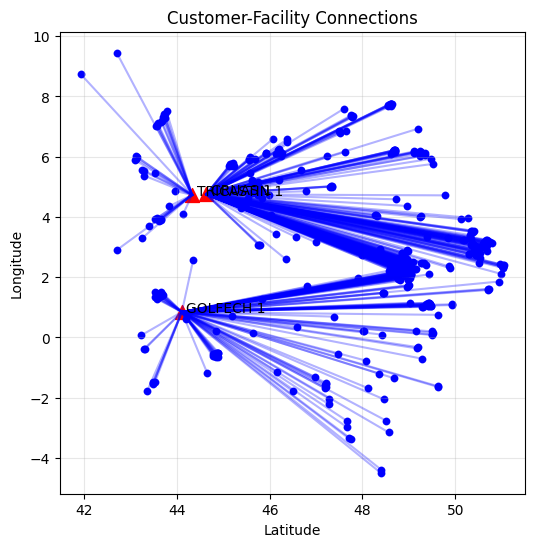

In [7]:
brute_force_solver = BruteForceObnPMed(france_cities, france_nuclear, 3)
startTime = time.perf_counter()
brute_force_solution, total_distance = brute_force_solver.solve()
endTime = time.perf_counter()

print(brute_force_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, brute_force_solution)

[DAMPIERRE 1 47.732638 2.517824, PENLY 1 49.976144 1.210236, TRICASTIN 1 44.326355 4.731541, FLAMANVILLE 1 49.535986 -1.883342, BLAYAIS 1 45.257605 -0.690606, GRAVELINES 1 51.012846 2.139287, ST-LAURENT B 1 47.720248 1.580217, ST-ALBAN 1 45.405445 4.755573, CATTENOM 1 49.415953 6.218271] 120180.1022201535
Elapsed time: 27.502007799999998


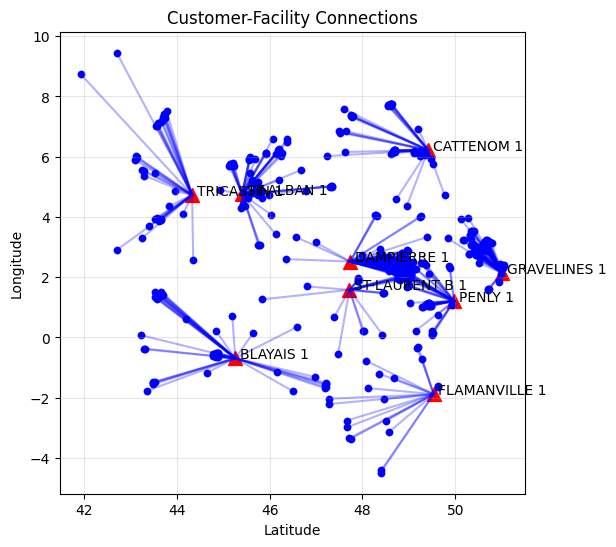

In [8]:
vns_solver = VNSObnPMed(france_cities, france_nuclear, 9, iters = 300)
startTime = time.perf_counter()
vns_solution, total_distance = vns_solver.solve()
endTime = time.perf_counter()

print(vns_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, vns_solution)

[BUGEY 2 45.801148 5.266072, CHOOZ B 1 50.090344 4.789588, ST-ALBAN 1 45.405445 4.755573, CATTENOM 1 49.415953 6.218271, PENLY 1 49.976144 1.210236, TRICASTIN 1 44.326355 4.731541, ST-LAURENT B 1 47.720248 1.580217, DAMPIERRE 1 47.732638 2.517824, BLAYAIS 1 45.257605 -0.690606] 100123.11624608206
Elapsed time: 3.340974700000004


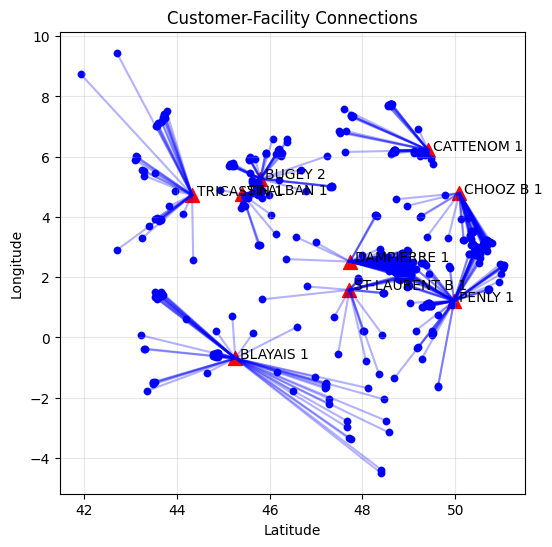

In [9]:
sa_solver = SAObnPMed(france_cities, france_nuclear, 9, iters = 300)
startTime = time.perf_counter()
sa_solution, total_distance = sa_solver.solve()
endTime = time.perf_counter()

print(sa_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, sa_solution)

[BUGEY 2 45.801148 5.266072, CHOOZ B 1 50.090344 4.789588, CIVAUX 1 46.46218 0.648879, NOGENT 1 48.514581 3.524182, CHINON B 1 47.228727 0.168307, ST-ALBAN 1 45.405445 4.755573, GOLFECH 1 44.105751 0.84572, CATTENOM 1 49.415953 6.218271, CRUAS 1 44.63283 4.750824] 104648.52162124478
Elapsed time: 5.6036565


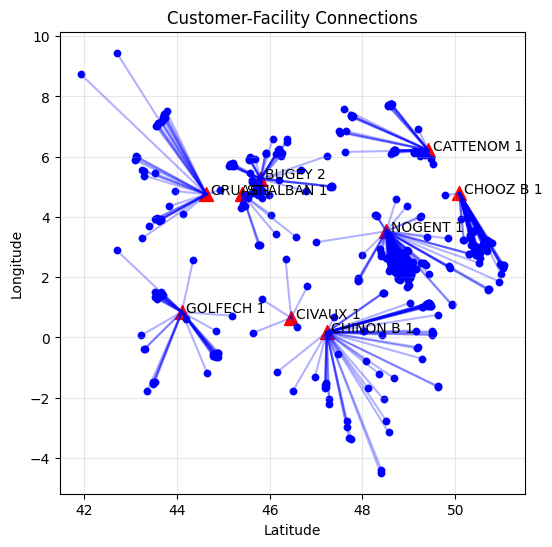

In [10]:
ts_solver = TSObnPMed(france_cities, france_nuclear, 9, iters = 500)
startTime = time.perf_counter()
ts_solution, total_distance = ts_solver.solve()
endTime = time.perf_counter()

print(ts_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, ts_solution)

In [11]:
print(calculate_bounds(france_cities))

((41.9267, 51.04129999999999), (-4.49, 9.4503))


[f 51.04129999999999 -1.1693903735531546, f 51.04129999999999 4.985505574037294, f 47.93432658411761 5.1200093492953025, f 42.47278697112679 6.073317885570832, f 50.943182050464415 7.100366966596239, f 44.004432929209024 -2.8838750303114624, f 50.68542274056552 0.6916395741251142, f 47.5898243065595 4.43220961956865, f 47.23485332525213 9.4503] 123741.84102288044
Elapsed time: 10.293016899999998


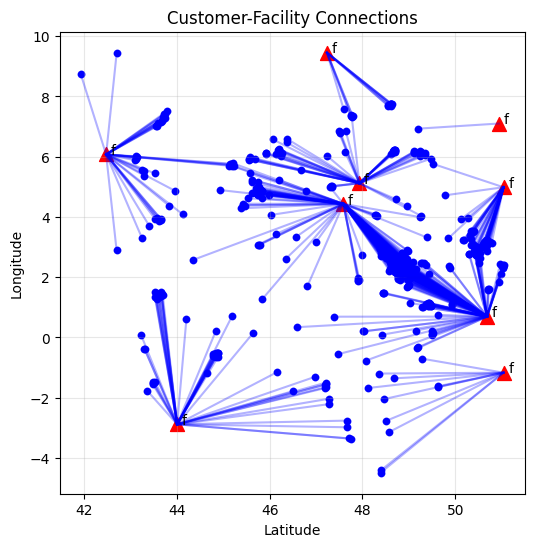

In [12]:
apf_solver = APFObnPMed(france_cities, 9, calculate_bounds(france_cities))
startTime = time.perf_counter()
apf_solution, total_distance = apf_solver.solve()
endTime = time.perf_counter()

print(apf_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, apf_solution)

Elapsed time: 12.543762099999995
[f 50.17250087444161 9.309083992551908, f 50.18711873408983 9.29414140289855, f 41.656235011257216 -2.556246125679581, f 52.35871666171993 4.568914070036151, f 52.838791182960094 2.514342586759765, f 42.14165305681097 -3.5734690819797765, f 52.53677444088859 0.42652182128967564, f 42.195761387193684 -3.791817286783376, f 40.90183670453354 3.0367623404690764] 248358.27494722354


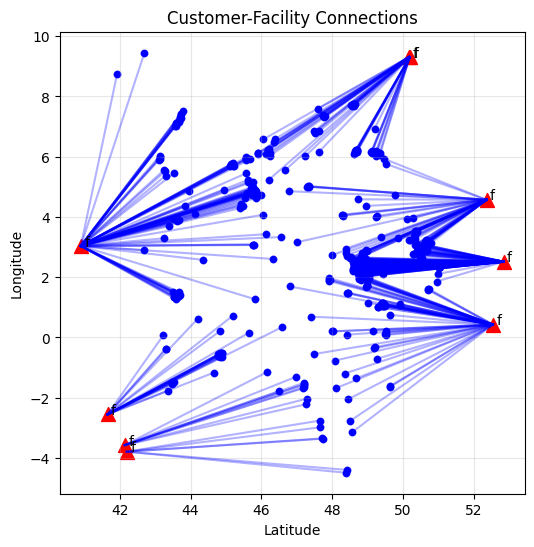

In [13]:
apfconstraint_solution = APFObnPMedWithConstraint(france_cities, 9, calculate_bounds(france_cities), 200)
startTime = time.perf_counter()
best_locations, total_distance = apfconstraint_solution.solve()
endTime = time.perf_counter()
print(f"Elapsed time: {endTime - startTime}")

print(best_locations, total_distance)
plot(france_cities, best_locations)

(BLAYAIS 1 45.257605 -0.690606, BUGEY 2 45.801148 5.266072, CHINON B 1 47.228727 0.168307, CIVAUX 1 46.46218 0.648879, CRUAS 1 44.63283 4.750824, FLAMANVILLE 1 49.535986 -1.883342, GOLFECH 1 44.105751 0.84572, ST-ALBAN 1 45.405445 4.755573, TRICASTIN 1 44.326355 4.731541) 138148.3254111005
Elapsed time: 532.1216955


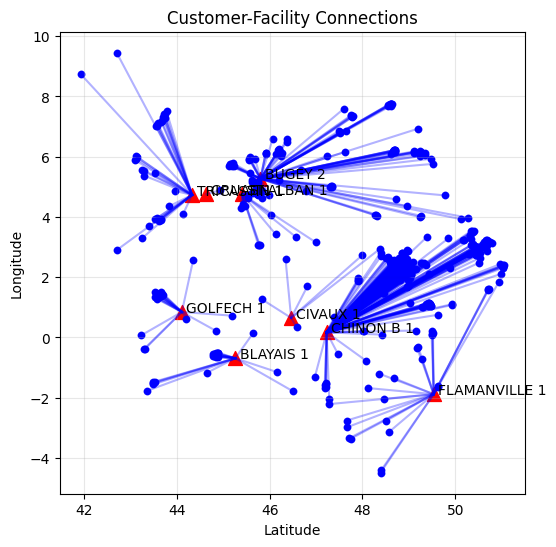

In [14]:
brute_force_solver = BruteForceObnPMed(france_cities, france_nuclear, 9)
startTime = time.perf_counter()
brute_force_solution, total_distance = brute_force_solver.solve()
endTime = time.perf_counter()

print(brute_force_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, brute_force_solution)

[BUGEY 2 45.801148 5.266072, TRICASTIN 1 44.326355 4.731541, NOGENT 1 48.514581 3.524182, BELLEVILLE 1 47.508946 2.875676, DAMPIERRE 1 47.732638 2.517824, GOLFECH 1 44.105751 0.84572, PENLY 1 49.976144 1.210236, CHINON B 1 47.228727 0.168307, GRAVELINES 1 51.012846 2.139287] 105627.14102739614
Elapsed time: 17.69198449999999


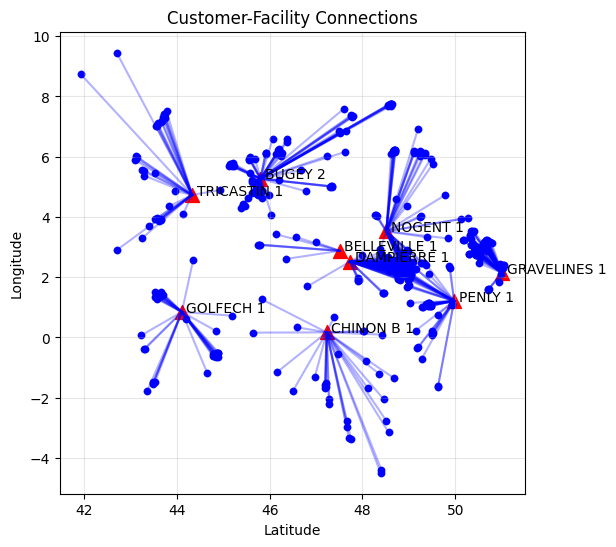

In [15]:
vns_solver = VNSObnPMed(france_cities, france_nuclear, 9, iters = 200)
startTime = time.perf_counter()
vns_solution, total_distance = vns_solver.solve()
endTime = time.perf_counter()

print(vns_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, vns_solution)

[NOGENT 1 48.514581 3.524182, CIVAUX 1 46.46218 0.648879, BELLEVILLE 1 47.508946 2.875676, GRAVELINES 1 51.012846 2.139287, ST-ALBAN 1 45.405445 4.755573, BLAYAIS 1 45.257605 -0.690606, CHINON B 1 47.228727 0.168307, TRICASTIN 1 44.326355 4.731541, PALUEL 1 49.858754 0.634759] 110398.50888334578
Elapsed time: 3.282217800000012


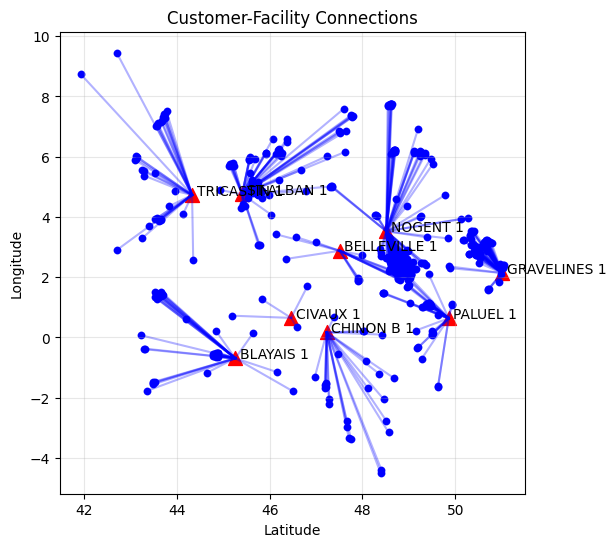

In [16]:
sa_solver = SAObnPMed(france_cities, france_nuclear, 9, iters = 300)
startTime = time.perf_counter()
sa_solution, total_distance = sa_solver.solve()
endTime = time.perf_counter()

print(sa_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, sa_solution)

[TRICASTIN 1 44.326355 4.731541, BUGEY 2 45.801148 5.266072, CIVAUX 1 46.46218 0.648879, GOLFECH 1 44.105751 0.84572, CHOOZ B 1 50.090344 4.789588, FLAMANVILLE 1 49.535986 -1.883342, ST-LAURENT B 1 47.720248 1.580217, ST-ALBAN 1 45.405445 4.755573, CRUAS 1 44.63283 4.750824] 103863.41528964133
Elapsed time: 3.494708599999967


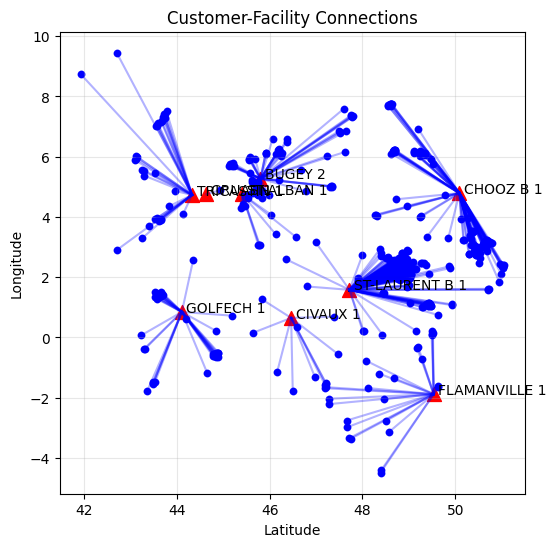

In [17]:
ts_solver = TSObnPMed(france_cities, france_nuclear, 9, iters = 300)
startTime = time.perf_counter()
ts_solution, total_distance = ts_solver.solve()
endTime = time.perf_counter()

print(ts_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, ts_solution)

[f 48.056489215576136 9.4503, f 41.94857256450615 3.5607067054248573, f 45.7841355726566 -3.6462952183932877, f 41.9267 3.566321471138422, f 48.04305170501226 9.4503, f 41.9267 -3.4298692711068104, f 44.674649533276906 -2.686163583764737, f 46.30447603510288 -4.458593436892329, f 46.3235653737619 -4.49] 278705.1902677523
Elapsed time: 20.735392700000034


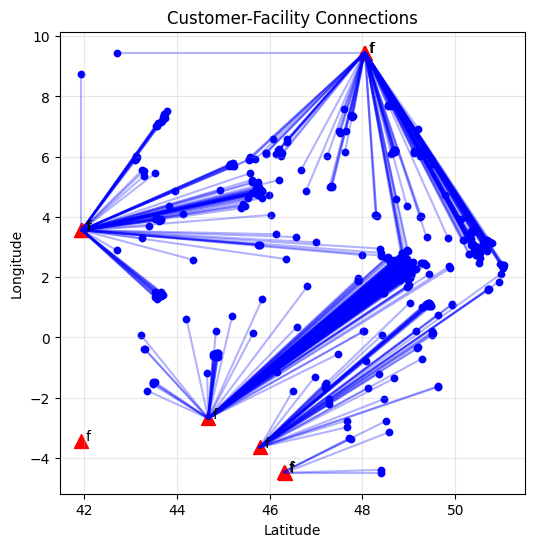

In [18]:
apf_solver = APFObnPMed(france_cities, 9, calculate_bounds(france_cities), iters = 200)
startTime = time.perf_counter()
apf_solution, total_distance = apf_solver.solve()
endTime = time.perf_counter()

print(apf_solution, total_distance)

print(f"Elapsed time: {endTime - startTime}")
plot(france_cities, apf_solution)

Elapsed time: 20.970478700000058
[f 51.03895497191735 9.400167070998897, f 41.82617691712007 -3.1187597729371466, f 50.39688135568511 -4.486248642598256, f 44.92826494346429 9.452791632890692, f 51.04129999999999 -4.414003048583567, f 41.511458611694316 1.0681722397439704, f 50.863651039272426 -4.49, f 44.92047825918525 9.4503, f 42.48959582036273 -3.923220352474344] 274012.5911623308


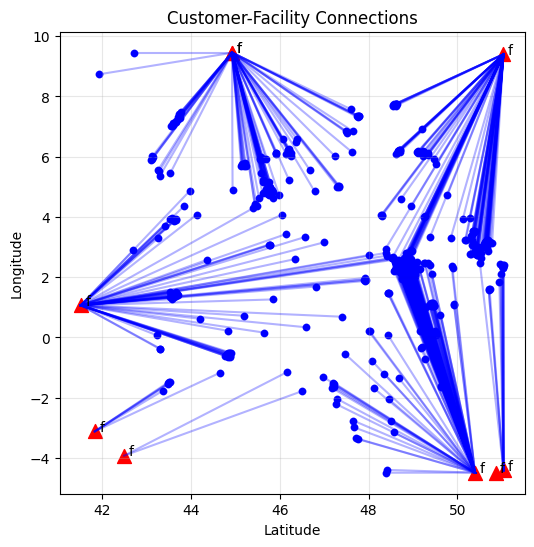

In [19]:
apfconstraint_solution = APFObnPMedWithConstraint(france_cities, 9, calculate_bounds(france_cities), 200, iters = 200)
startTime = time.perf_counter()
best_locations, total_distance = apfconstraint_solution.solve()
endTime = time.perf_counter()
print(f"Elapsed time: {endTime - startTime}")

print(best_locations, total_distance)
plot(france_cities, best_locations)

In [20]:
# Brute force for Austria:

austria_plants_csv =  pd.read_csv("TestData/AustriaThermal/input_plant-list_AT_thermal.csv", encoding = "Unicode Escape")
austria_plants_csv.drop_duplicates(subset = ['lat', 'lon'], keep = 'first', inplace = True)
austria_plants_csv.dropna(subset = ['name', 'lat', 'lon'],inplace = True)
austria_plants = generate_units(austria_plants_csv['name'].to_string(), austria_plants_csv['lat'].to_string(), austria_plants_csv['lon'].to_string())

austria_cities_csv = pd.read_csv("TestData/AustriaThermal/at.csv", encoding = "Unicode Escape")
austria_cities_csv.drop_duplicates(subset = ['lat', 'lng'], keep = 'first', inplace = True)
austria_cities_csv.dropna(subset = ['city', 'lat', 'lng'], inplace = True)
austria_cities = generate_units(austria_cities_csv['city'].to_string(), austria_cities_csv['lat'].to_string(), austria_cities_csv['lng'].to_string())

p = round(len(austria_plants)/2)

austria_bf = BruteForceObnPMed(austria_cities, austria_plants, p)
startTime = time.perf_counter()
austria_bf_solution, austria_bf_distance = austria_bf.solve()
endTime = time.perf_counter()
print(f"Brute force took {endTime - startTime}s finding solution of {austria_bf_distance}km.")

Brute force took 0.960010699999998s finding solution of 21700.264899587302km.


Finding the best and fastest method for Austria:
VNS took 1.0811476000000084s finding solution of 21700.264899587302km.
SA took 0.21062369999992825s finding solution of 21700.264899587302km.
TS took 0.21552910000002612s finding solution of 21116.459890012145km.
****************************************************************************************************
The method with the best solution is: VNS with total distance of 21700.264899587302km.
The fastest method is: Simulated annealing with total elapsed time of 0.21062369999992825s.
****************************************************************************************************
Plotting the best optimization method:
[Salzburg-Mitte Heizkraftwerk 47.80929 13.03819, Wels Fernheizkraftwerk 48.15184 14.00755, Simmering 1 48.18331 16.43375, Salzburg-Nord Heizkraftwerk 47.82744 13.03398, Linz-SÃ¼d Fernheizkraftwerk 48.267893 14.346898, Donaustadt 48.19878 16.46315]


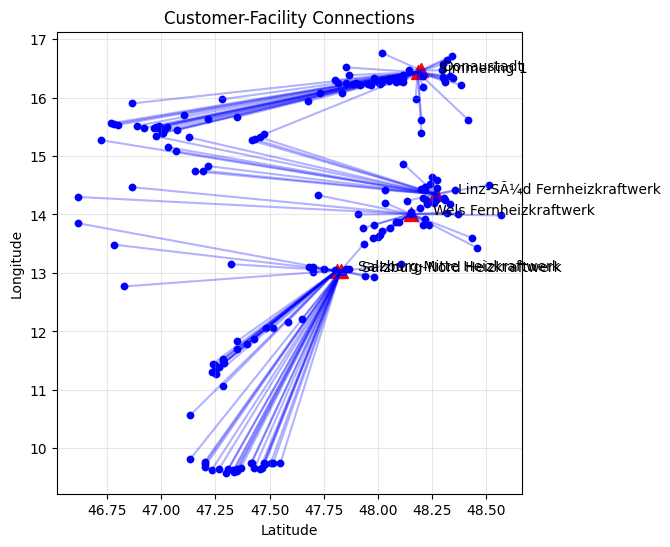

In [21]:
# Best opt. method, fastest opt. method for thermal power plants in Austria:
print("Finding the best and fastest method for Austria:")
best_austria = (None, None, None)
fastest_austria = (None, None, None)

p = round(len(austria_plants)/2)

austria_vns = VNSObnPMed(austria_cities, austria_plants, p)
startTime = time.perf_counter()
austria_vns_solution, austria_vns_distance = austria_vns.solve()
endTime = time.perf_counter()
elapsedTime = endTime - startTime
print(f"VNS took {elapsedTime}s finding solution of {austria_vns_distance}km.")

best_austria = (austria_vns_solution, str(austria_vns), austria_vns_distance)
fastest_austria = (austria_vns_solution, str(austria_vns), elapsedTime)

austria_sa = SAObnPMed(austria_cities, austria_plants, p)
startTime = time.perf_counter()
austria_sa_solution, austria_sa_distance = austria_sa.solve()
endTime = time.perf_counter()
elapsedTime = endTime - startTime
print(f"SA took {elapsedTime}s finding solution of {austria_sa_distance}km.")

if elapsedTime < fastest_austria[2]:
    fastest_austria = (austria_vns_solution, str(austria_sa), elapsedTime)
if austria_sa_distance > best_austria[2]:
    best_austria = (austria_vns_solution, str(austria_sa), austria_sa_distance)

austria_ts = TSObnPMed(austria_cities, austria_plants, p)
startTime = time.perf_counter()
austria_ts_solution, austria_ts_distance = austria_ts.solve()
endTime = time.perf_counter()
elapsedTime = endTime - startTime
print(f"TS took {elapsedTime}s finding solution of {austria_ts_distance}km.")

if elapsedTime < fastest_austria[2]:
    fastest_austria = (austria_ts_solution, str(austria_ts), elapsedTime)
if austria_ts_distance > best_austria[2]:
    best_austria = (austria_ts_solution, str(austria_ts), austria_ts_distance)

print("*" * 100)
print(f"The method with the best solution is: {best_austria[1]} with total distance of {best_austria[2]}km.")
print(f"The fastest method is: {fastest_austria[1]} with total elapsed time of {fastest_austria[2]}s.")
print("*" * 100)

print("Plotting the best optimization method:")
print(best_austria[0])
plot(austria_cities, best_austria[0])

Arbitrarily positioned took 1.305972499999939s finding solution of 22082.857654927528km.
Plotting:


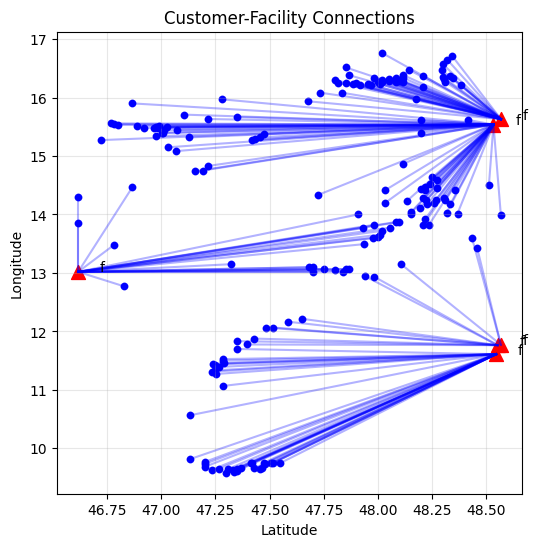

In [22]:
# Arbitrarily positioned in Austria
austria_abf = APFObnPMed(austria_cities, p, calculate_bounds(austria_cities))
startTime = time.perf_counter()
austria_abf_solution, austria_abf_distance = austria_abf.solve()
endTime = time.perf_counter()
print(f"Arbitrarily positioned took {endTime - startTime}s finding solution of {austria_abf_distance}km.")
print("Plotting:")
plot(austria_cities, austria_abf_solution)

In [23]:
# Brute force for Denmark

denmark_plants_csv =  pd.read_csv("TestData/DenmarkThermal/input_plant-list_DK.csv", encoding = "Unicode Escape")
denmark_plants_csv.drop_duplicates(subset = ['lat', 'lon'], keep = 'first', inplace = True)
denmark_plants_csv.dropna(subset = ['name', 'lat', 'lon'],inplace = True)
denmark_plants = generate_units(denmark_plants_csv['name'].to_string(), denmark_plants_csv['lat'].to_string(), denmark_plants_csv['lon'].to_string())

denmark_cities_csv = pd.read_csv("TestData/DenmarkThermal/dk.csv", encoding = "Unicode Escape")
denmark_cities_csv.drop_duplicates(subset = ['lat', 'lng'], keep = 'first', inplace = True)
denmark_cities_csv.dropna(subset = ['city', 'lat', 'lng'], inplace = True)
denmark_cities = generate_units(denmark_cities_csv['city'].to_string(), denmark_cities_csv['lat'].to_string(), denmark_cities_csv['lng'].to_string())

p = round(len(denmark_plants)/2)

denmark_bf = BruteForceObnPMed(denmark_cities, denmark_plants, p)
startTime = time.perf_counter()
denmark_bf_solution, denmark_bf_distance = denmark_bf.solve()
endTime = time.perf_counter()
print(f"Brute force took {endTime - startTime}s finding solution of {denmark_bf_distance}km.")

Brute force took 8.087165999999911s finding solution of 16299.39401964358km.


Finding the best and fastest method for Denmark:
VNS took 1.4747007999999369s finding solution of 13452.303611845327km.
SA took 0.24118120000002818s finding solution of 13247.588649461006km.
TS took 0.23684229999992112s finding solution of 13773.483181367865km.
****************************************************************************************************
The method with the best solution is: Taboo search with total distance of 13773.483181367865km.
The fastest method is: Taboo search with total elapsed time of 0.23684229999992112s.
****************************************************************************************************
Plotting the best optimization method:
[H.C. Ãrsted Power Station (Unit 7) 55.65757 12.55563, AsnÃ¦s Power Station (Unit 2) 55.66252 11.08156, Fyn Power Station (Unit 7) 55.42938 10.41203, SkÃ¦rbÃ¦k Power Station (Unit 3) 55.51132 9.61331, Esbjerg Power Station (Unit 3) 55.45632 8.45523, Nordjylland Power Station (Gas Turbine Unit) 57.0726 10.04252, He

C:\Users\som\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


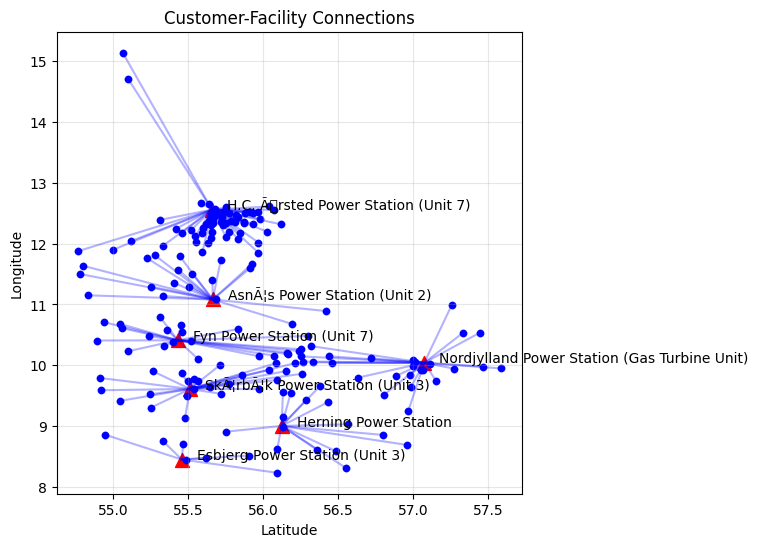

In [24]:
# Best opt. method, fastest opt. method for thermal power plants in Denmark:
print("Finding the best and fastest method for Denmark:")
best_denmark = (None, None, None)
fastest_denmark = (None, None, None)

p = round(len(denmark_plants)/2)

denmark_vns = VNSObnPMed(denmark_cities, denmark_plants, p)
startTime = time.perf_counter()
denmark_vns_solution, denmark_vns_distance = denmark_vns.solve()
endTime = time.perf_counter()
elapsedTime = endTime - startTime
print(f"VNS took {elapsedTime}s finding solution of {denmark_vns_distance}km.")

best_denmark = (denmark_vns_solution, str(denmark_vns), denmark_vns_distance)
fastest_denmark = (denmark_vns_solution, str(denmark_vns), elapsedTime)

denmark_sa = SAObnPMed(denmark_cities, denmark_plants, p)
startTime = time.perf_counter()
denmark_sa_solution, denmark_sa_distance = denmark_sa.solve()
endTime = time.perf_counter()
elapsedTime = endTime - startTime
print(f"SA took {elapsedTime}s finding solution of {denmark_sa_distance}km.")

if elapsedTime < fastest_denmark[2]:
    fastest_denmark = (denmark_vns_solution, str(denmark_sa), elapsedTime)
if denmark_sa_distance > best_denmark[2]:
    best_denmark = (denmark_vns_solution, str(denmark_sa), denmark_sa_distance)

denmark_ts = TSObnPMed(denmark_cities, denmark_plants, p)
startTime = time.perf_counter()
denmark_ts_solution, denmark_ts_distance = denmark_ts.solve()
endTime = time.perf_counter()
elapsedTime = endTime - startTime
print(f"TS took {elapsedTime}s finding solution of {denmark_ts_distance}km.")

if elapsedTime < fastest_denmark[2]:
    fastest_denmark = (denmark_ts_solution, str(denmark_ts), elapsedTime)
if denmark_ts_distance > best_denmark[2]:
    best_denmark = (denmark_ts_solution, str(denmark_ts), denmark_ts_distance)

print("*" * 100)
print(f"The method with the best solution is: {best_denmark[1]} with total distance of {best_denmark[2]}km.")
print(f"The fastest method is: {fastest_denmark[1]} with total elapsed time of {fastest_denmark[2]}s.")
print("*" * 100)

print("Plotting the best optimization method:")
print(best_denmark[0])
plot(denmark_cities, best_denmark[0])

Arbitrarily positioned took 1.723083400000064s finding solution of 17241.904221076384km.
Plotting:


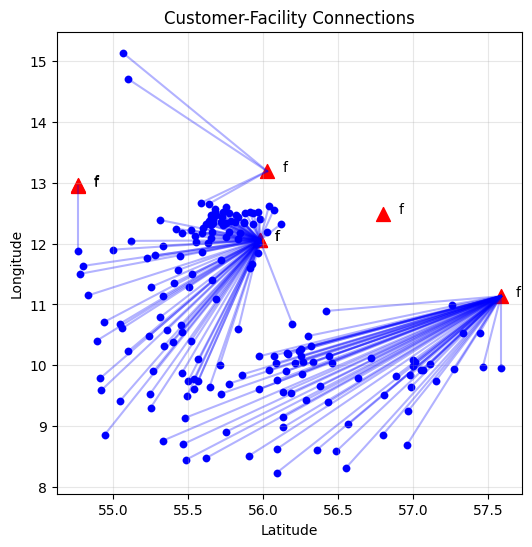

In [25]:
# Arbitrarily positioned in Denmark
denmark_abf = APFObnPMed(denmark_cities, p, calculate_bounds(denmark_cities))
startTime = time.perf_counter()
denmark_abf_solution, denmark_abf_distance = denmark_abf.solve()
endTime = time.perf_counter()
print(f"Arbitrarily positioned took {endTime - startTime}s finding solution of {denmark_abf_distance}km.")
print("Plotting:")
plot(denmark_cities, denmark_abf_solution)

In [26]:
# Brute force for Sweden

sweden_plants_csv =  pd.read_csv("TestData/SwedenThermal/input_plant-list_SE.csv", encoding = "Unicode Escape")
sweden_plants_csv.drop_duplicates(subset = ['lat', 'lon'], keep = 'first', inplace = True)
sweden_plants_csv.dropna(subset = ['name', 'lat', 'lon'],inplace = True)
sweden_plants = generate_units(sweden_plants_csv['name'].to_string(), sweden_plants_csv['lat'].to_string(), sweden_plants_csv['lon'].to_string())

sweden_cities_csv = pd.read_csv("TestData/SwedenThermal/se.csv", encoding = "Unicode Escape")
sweden_cities_csv.drop_duplicates(subset = ['lat', 'lng'], keep = 'first', inplace = True)
sweden_cities_csv.dropna(subset = ['city', 'lat', 'lng'], inplace = True)
sweden_cities = generate_units(sweden_cities_csv['city'].to_string(), sweden_cities_csv['lat'].to_string(), sweden_cities_csv['lng'].to_string())

# Takes too long
# p = round(len(sweden_plants)/2)

# sweden_bf = BruteForceObnPMed(sweden_cities, sweden_plants, p)
# startTime = time.perf_counter()
# sweden_bf_solution, sweden_bf_distance = sweden_bf.solve()
# endTime = time.perf_counter()
# print(f"Brute force took {endTime - startTime}s finding solution of {sweden_bf_distance}km.")

Finding the best and fastest method for Sweden:
VNS took 2.758884099999932s finding solution of 24146.83644096758km.
SA took 0.2511341000000584s finding solution of 14608.025953244629km.
TS took 0.3194263000000319s finding solution of 24146.83644096758km.
****************************************************************************************************
The method with the best solution is: VNS with total distance of 24146.83644096758km.
The fastest method is: Simulated annealing with total elapsed time of 0.2511341000000584s.
****************************************************************************************************
Plotting the best optimization method:
[HarsprÃ¥nget G1 56.152251 14.833831, Ritsem G1 57.692831 11.890257, Porsi G3 57.258987 12.110433, Gallejaur G1 66.885309 19.818399, Forsmark G11+G12 59.852308 17.678173, Letsi G1 66.80939 19.896293, Bastusel G1 60.403993 18.174347, Rya kraftvÃ¤rmeverk (GÃ¶teborg) 66.976846 18.573706, Karlshamn G1 66.503203 20.380167, Fyris 

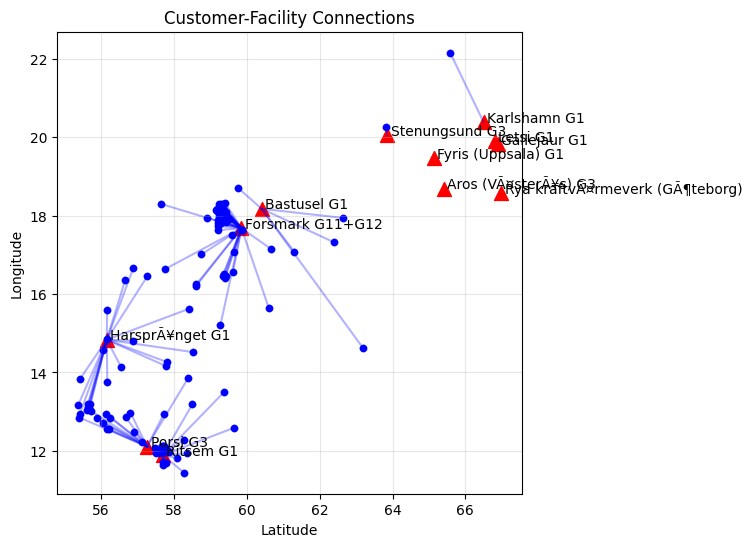

In [27]:
# Best opt. method, fastest opt. method for thermal power plants in Sweden:
print("Finding the best and fastest method for Sweden:")
best_sweden = (None, None, None)
fastest_sweden = (None, None, None)

p = round(len(sweden_plants)/2)

sweden_vns = VNSObnPMed(sweden_cities, sweden_plants, p)
startTime = time.perf_counter()
sweden_vns_solution, sweden_vns_distance = sweden_vns.solve()
endTime = time.perf_counter()
elapsedTime = endTime - startTime
print(f"VNS took {elapsedTime}s finding solution of {sweden_vns_distance}km.")

best_sweden = (sweden_vns_solution, str(sweden_vns), sweden_vns_distance)
fastest_sweden = (sweden_vns_solution, str(sweden_vns), elapsedTime)

sweden_sa = SAObnPMed(sweden_cities, sweden_plants, p)
startTime = time.perf_counter()
sweden_sa_solution, sweden_sa_distance = sweden_sa.solve()
endTime = time.perf_counter()
elapsedTime = endTime - startTime
print(f"SA took {elapsedTime}s finding solution of {sweden_sa_distance}km.")

if elapsedTime < fastest_sweden[2]:
    fastest_sweden = (sweden_vns_solution, str(sweden_sa), elapsedTime)
if sweden_sa_distance > best_sweden[2]:
    best_sweden = (sweden_vns_solution, str(sweden_sa), sweden_sa_distance)

sweden_ts = TSObnPMed(sweden_cities, sweden_plants, p)
startTime = time.perf_counter()
sweden_ts_solution, sweden_ts_distance = sweden_ts.solve()
endTime = time.perf_counter()
elapsedTime = endTime - startTime
print(f"TS took {elapsedTime}s finding solution of {sweden_ts_distance}km.")

if elapsedTime < fastest_sweden[2]:
    fastest_sweden = (sweden_ts_solution, str(sweden_ts), elapsedTime)
if sweden_ts_distance > best_sweden[2]:
    best_sweden = (sweden_ts_solution, str(sweden_ts), sweden_ts_distance)

print("*" * 100)
print(f"The method with the best solution is: {best_sweden[1]} with total distance of {best_sweden[2]}km.")
print(f"The fastest method is: {fastest_sweden[1]} with total elapsed time of {fastest_sweden[2]}s.")
print("*" * 100)

print("Plotting the best optimization method:")
print(best_sweden[0])
plot(sweden_cities, best_sweden[0])

Arbitrarily positioned took 3.113953199999969s finding solution of 21590.16290290477km.
Plotting:


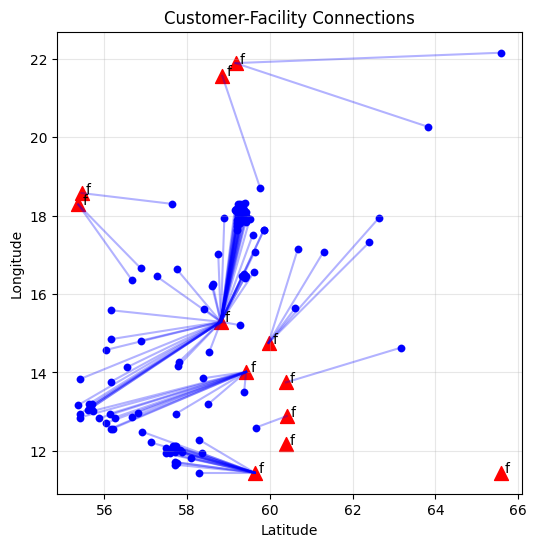

In [28]:
# Arbitrarily positioned in Sweden
sweden_abf = APFObnPMed(sweden_cities, p, calculate_bounds(sweden_cities))
startTime = time.perf_counter()
sweden_abf_solution, sweden_abf_distance = sweden_abf.solve()
endTime = time.perf_counter()
print(f"Arbitrarily positioned took {endTime - startTime}s finding solution of {sweden_abf_distance}km.")
print("Plotting:")
plot(sweden_cities, sweden_abf_solution)